In [1]:
!pip install tflearn

%matplotlib inline
from matplotlib.pyplot import figure, imshow, axis
import matplotlib.pyplot as plt
import pandas as pd

import cv2 as cv
import numpy as np

from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.optimizers import Adam

from sklearn.svm import SVC


import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tflearn.layers.estimator import regression

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import tflearn.datasets.oxflower17 as oxflower17

In [3]:
X, Y = oxflower17.load_data(one_hot=False)

In [4]:
X.shape,Y.shape

((1360, 224, 224, 3), (1360,))

In [5]:
X[0]

array([[[0.3372549 , 0.40392157, 0.26666668],
        [0.3254902 , 0.39215687, 0.25882354],
        [0.3137255 , 0.38039216, 0.25490198],
        ...,
        [0.24705882, 0.29803923, 0.1254902 ],
        [0.25490198, 0.30588236, 0.13333334],
        [0.2627451 , 0.3137255 , 0.14117648]],

       [[0.3529412 , 0.41960785, 0.28627452],
        [0.34117648, 0.40784314, 0.28235295],
        [0.3372549 , 0.40392157, 0.28235295],
        ...,
        [0.24705882, 0.29803923, 0.11764706],
        [0.2509804 , 0.3019608 , 0.13333334],
        [0.25490198, 0.30588236, 0.13333334]],

       [[0.3764706 , 0.4392157 , 0.3254902 ],
        [0.35686275, 0.41960785, 0.3137255 ],
        [0.34509805, 0.40784314, 0.3019608 ],
        ...,
        [0.2509804 , 0.30980393, 0.12156863],
        [0.2509804 , 0.30980393, 0.12941177],
        [0.2509804 , 0.30980393, 0.12941177]],

       ...,

       [[0.10588235, 0.16470589, 0.01568628],
        [0.08627451, 0.13333334, 0.00392157],
        [0.08235294, 0

In [6]:
# The data is already normalized.
X.min(), X.max()

(0.0, 1.0)

In [7]:
# Target labels are encoded already
Y[0]

6

## 3. Data visualisation:

### Display the images

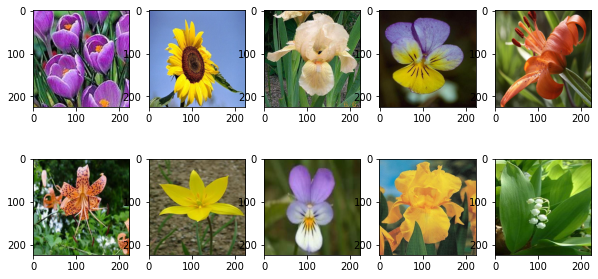

In [9]:
plt.figure(figsize=(10,5)) 

for i in range(10):
  plt.subplot(2,5,i+1)   
  plt.imshow(X[i])
plt.show()

### Display the labels

In [10]:
print(Y[0:10])

[11 16 12  8 13 13 14  8 12  9]


### Display images vs labels

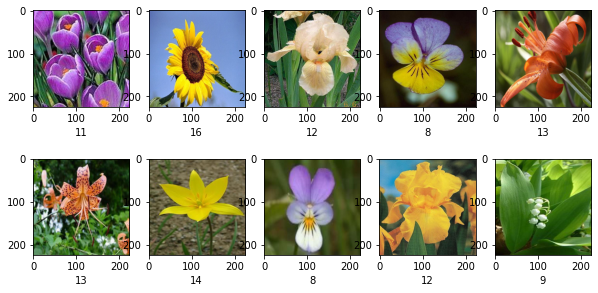

In [11]:
plt.figure(figsize=(10,5)) 

for i in range(10):
  plt.subplot(2,5,i+1)   
  plt.imshow(X[i])
  plt.xlabel(Y[i])
plt.show()

### Apply different filters [ for example: blur, contour, edge detection, emboss, smooth etc.] on the images and display the image

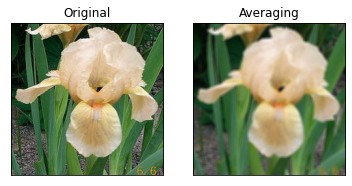

In [12]:
img = X[2]

# Averaging

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

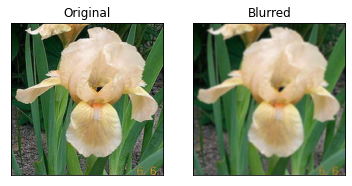

In [13]:
# GaussianBlur

blur = cv.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

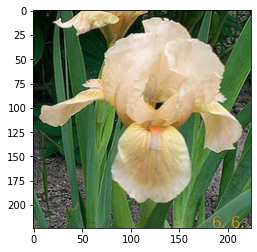

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


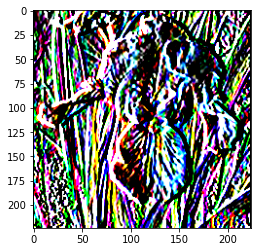

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


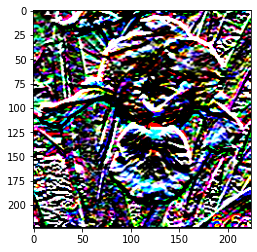

In [19]:
import cv2
frame = X[2]

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
lower_red = np.array([30,150,50])
upper_red = np.array([255,255,180])

mask = cv2.inRange(hsv, lower_red, upper_red)
res = cv2.bitwise_and(frame,frame, mask= mask)

# laplacian = cv2.Laplacian(frame,cv2.CV_64F)
sobelx = cv2.Sobel(frame,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(frame,cv2.CV_64F,0,1,ksize=5)

# cv2.imshow('Original',frame)
# cv2.imshow('Mask',mask)
# cv2.imshow('laplacian',laplacian)
# cv2.imshow('sobelx',sobelx)
# cv2.imshow('sobely',sobely)
plt.imshow(frame)
plt.show()

plt.imshow(sobelx)
plt.show()

plt.imshow(sobely)
plt.show()

## 4. Train tune and test AIML image classifier model using:

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8)

In [6]:
print(xtrain.shape)
print(xtest.shape)

print(ytrain.shape)
print(ytest.shape)

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088,)
(272,)


In [7]:
x_train=xtrain.reshape(xtrain.shape[0],224*224*3)
x_test=xtest.reshape(xtest.shape[0],224*224*3)

In [8]:
print(x_train.shape)
print(x_test.shape)

(1088, 150528)
(272, 150528)


## Use supervised learning algorithms for training

In [9]:
classifier = SVC(gamma=0.001)
classifier.fit(x_train,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
classifier.score(x_test,ytest)

0.11029411764705882

### Use neural networks for training

In [11]:
ytrain_h = to_categorical(ytrain)
ytest_h= to_categorical(ytest)

In [12]:
print(ytrain[0])
ytrain_h[0]

2


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [18]:
#Build neural Network Model
model_ann = models.Sequential()
model_ann.add(Dense(1024 ,activation = 'relu'))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dense(256,activation = 'relu'))
model_ann.add(Dense(256,activation = 'relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(512,activation = 'relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(512,activation = 'relu'))
# model_ann.add(Dropout(0.3))
model_ann.add(Dense(17,activation='softmax'))

In [19]:
model_ann.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [20]:
model_ann.fit(x_train,ytrain_h,epochs = 50,batch_size=32,validation_data=(x_test,ytest_h))

Train on 1088 samples, validate on 272 samples
Epoch 1/50
1088/1088 [==============================] - ETA: 0s - loss: 7.3804 - acc: 0.0625

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 3s 3ms/sample - loss: 7.3804 - acc: 0.0625 - val_loss: 2.9280 - val_acc: 0.0551
Epoch 2/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.9702 - acc: 0.0643 - val_loss: 2.8121 - val_acc: 0.0772
Epoch 3/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.8698 - acc: 0.0763 - val_loss: 2.7798 - val_acc: 0.1103
Epoch 4/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.7593 - acc: 0.1002 - val_loss: 2.6153 - val_acc: 0.1434
Epoch 5/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.6066 - acc: 0.1369 - val_loss: 2.4239 - val_acc: 0.1544
Epoch 6/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.4401 - acc: 0.1590 - val_loss: 2.3040 - val_acc: 0.1912
Epoch 7/50
1088/1088 [==============================] - 3s 2ms/sample - loss: 2.3300 - acc: 0.1866 - val_loss: 2.4049 - val_acc: 0.1618
Epoch 8/50
1088/1088 [==============================] - 3s 

In [21]:
model_ann.evaluate(x_test,ytest_h)

[2.2180942787843594, 0.375]

### Use CNN for training

In [95]:
Y[0]

3

In [24]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

In [25]:
# train_gen = datagen.flow_from_directory(X)
datagen.fit(X.reshape(X.shape[0], 224, 224, 3))

BEFORE:



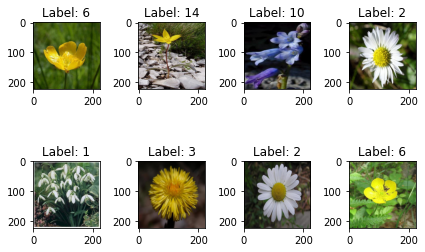


AFTER:



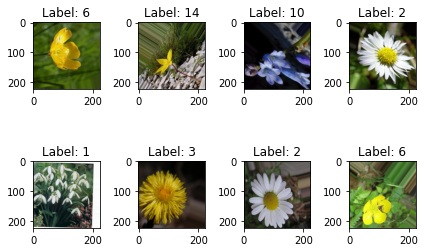

In [26]:
# define number of rows & columns
num_row = 2
num_col = 4
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(Y[i]))
plt.tight_layout()
plt.show()
# plot after
print()
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X.reshape(X.shape[0], 224, 224, 3),Y,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i], cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


In [27]:
# image_size = 64
batch_size = 32

Y = to_categorical(Y)

In [31]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',input_shape=(224, 224, 3)))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
# model.add(Dropout(0.5))

model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
# model.add(Dropout(0.5))

#Add Global Max Pool layer
model.add(tf.keras.layers.GlobalMaxPool2D())

#Add Dense Layers after flattening the data
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

In [32]:
epochs = 50
# learning_rate = 0.001
# optimizer = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=learning_rate/epochs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(datagen.flow(xtrain.reshape(xtrain.shape[0], 224, 224, 3),ytrain_h,batch_size=batch_size,shuffle=False),epochs = epochs,validation_data=(xtest,ytest_h))

Epoch 1/50
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 3.1388 - acc: 0.0800

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 15s 406ms/step - batch: 16.5000 - size: 32.0000 - loss: 3.1388 - acc: 0.0800 - val_loss: 2.7950 - val_acc: 0.0699
Epoch 2/50
34/34 [==============================] - 13s 394ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.4966 - acc: 0.1792 - val_loss: 2.7829 - val_acc: 0.0956
Epoch 3/50
34/34 [==============================] - 14s 407ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.2360 - acc: 0.2721 - val_loss: 2.7402 - val_acc: 0.1103
Epoch 4/50
34/34 [==============================] - 14s 405ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.0692 - acc: 0.3033 - val_loss: 2.7157 - val_acc: 0.1324
Epoch 5/50
34/34 [==============================] - 13s 403ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.8403 - acc: 0.3796 - val_loss: 2.9498 - val_acc: 0.0735
Epoch 6/50
34/34 [==============================] - 13s 403ms/step - batch: 16.5000 - size: 32.0000 - loss: 1.7186 - acc: 0.4292 - val_loss: 2.5755 - val_acc: 0.1287
Epoch 7/50
34/3

In [34]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

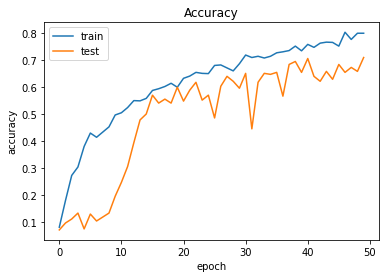

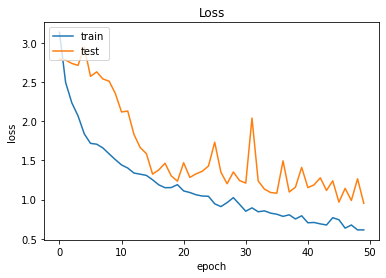

In [36]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Use various CNN with transferred learning models for training

In [62]:
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [63]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [64]:
for layer in vgg_model.layers[:-3]:
  layer.trainable = False

In [65]:
model_vgg = Sequential()
model_vgg.add(vgg_model)
model_vgg.add(Flatten())
model_vgg.add(Dense(1024,activation='relu'))
model_vgg.add(Dropout(0.5))
# model_vgg.add(Dense(250, activation='relu'))
# model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(17, activation='softmax'))
model_vgg.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 17)                17425     
Total params: 40,423,249
Trainable params: 30,428,177
Non-trainable params: 9,995,072
_________________________________________________________________


In [66]:
epochs = 50
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# history = model_vgg.fit(X,Y,batch_size=batch_size,epochs = epochs,validation_split=0.2)
# model_vgg.fit(datagen.flow(xtrain.reshape(xtrain.shape[0], 224, 224, 3),ytrain_h,batch_size=batch_size,shuffle=False),epochs = epochs,
#               validation_data=(xtest,ytest_h))

history = model_vgg.fit(datagen.flow(xtrain.reshape(xtrain.shape[0], 224, 224, 3),ytrain_h,batch_size=batch_size,shuffle=False),epochs = epochs,validation_data=(xtest,ytest_h))

Epoch 1/50
34/34 [==============================] - ETA: 0s - batch: 16.5000 - size: 32.0000 - loss: 3.0299 - acc: 0.0790

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


34/34 [==============================] - 18s 475ms/step - batch: 16.5000 - size: 32.0000 - loss: 3.0299 - acc: 0.0790 - val_loss: 2.8360 - val_acc: 0.0441
Epoch 2/50
34/34 [==============================] - 16s 463ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8334 - acc: 0.0616 - val_loss: 2.8382 - val_acc: 0.0441
Epoch 3/50
34/34 [==============================] - 16s 469ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8331 - acc: 0.0662 - val_loss: 2.8394 - val_acc: 0.0441
Epoch 4/50
34/34 [==============================] - 16s 469ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8335 - acc: 0.0524 - val_loss: 2.8394 - val_acc: 0.0368
Epoch 5/50
34/34 [==============================] - 16s 470ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8324 - acc: 0.0662 - val_loss: 2.8413 - val_acc: 0.0441
Epoch 6/50
34/34 [==============================] - 16s 471ms/step - batch: 16.5000 - size: 32.0000 - loss: 2.8332 - acc: 0.0607 - val_loss: 2.8410 - val_acc: 0.0441
Epoch 7/50
34/3

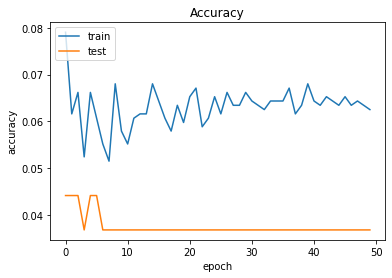

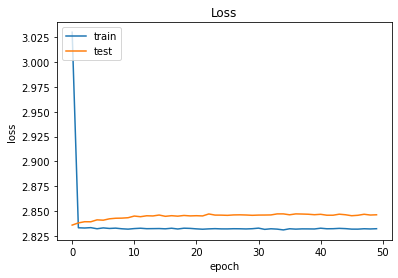

In [68]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In This case custom model worked well with accuracy of 70%, where as Dense model with 37% and VGG with 3.6%.

## Create a GUI to import the image

In [72]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(f'Predicted Class is : {np.argmax(classes[0])}')

Saving Sunflower.jpg to Sunflower (3).jpg
Predicted Class is : 13
